# Phân tích gian lận thi cử 2018 (tỉnh Hà Giang) 
---

## Các bước thực hiện:
1. Thống kê điểm thi các môn thi và các khối thi
2. Thống kê số thí sinh có điểm các khối > 27 trong tỉnh và cả nước

___Thư viện:___

In [723]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import json

___Hằng số:___

In [724]:
NUM_BINS = 40
SUP_TITLE_SIZE = 30
TITLE_SIZE = 25
LABEL_SIZE = 15
HIST_PROVINCE_COLOR = '#F7C51D'
HIST_TOTAL_COLOR = '#2596BE'
HISTOGRAM_WIDTH = 30
HISTOGRAM_HEIGHT = 15
DEFAULT_PROVINCE_NAME = 'Hà Giang'
DEFAULT_RANGE = (0, 10)
DEFAULT_BINS = 40
PIE_HEIGHT = 500
PIE_WIDTH = 1500
PIE_PROVINCE_COLOR = '#ce3b44'
PIE_TOTAL_COLOR = '#5274c0'

___Load dữ liệu:___

In [725]:
with open('Dataset.json') as json_file:
    provinces = json.load(json_file)
data = {}
for province in provinces:
    data[province['province']] = pd.read_csv(province['file'])
    data[province['province']].set_index('SBD')

total_data = pd.concat(list(data.values()))
data['Cả nước'] = total_data

__Hàm bổ trợ:__

In [726]:
# Count number of values in each bin
def count_values(data, bins):
    nums = [0] * (len(bins) - 1)
    for i in range(len(bins) - 2, -1, -1):
        nums[i] = data[data >= bins[i]].count()
    for i in range(0, len(nums) - 1):
        nums[i] = nums[i] - nums[i+1]
    return nums

# Display number of value on each bar
def display_label_each_bar(histogram, values):
    for bar, value in zip(histogram.patches, values):
        height = bar.get_height()
        histogram.text(bar.get_x() + bar.get_width()/2.0, height + 4, value, ha='center')


def set_label_and_title(histogram, x_label, y_label, title):
    histogram.set_title(title, fontsize = TITLE_SIZE)
    histogram.set_xlabel(x_label, fontsize = LABEL_SIZE)
    histogram.set_ylabel(y_label, fontsize = LABEL_SIZE)


def set_data_histogram(histogram, data, color_code, bins):
    histogram.grid(axis='y')
    histogram.hist(data, bins = bins, zorder = 2, rwidth=0.85, color = color_code)
    histogram.set_xticks(bins)
    display_label_each_bar(histogram, count_values(data, bins))


def display_mean_variance(histogram, owner_name, subject_name):
    mean = round(data[owner_name][subject_name].mean(), 2)
    std = round(data[owner_name][subject_name].std(), 2)
    histogram.annotate(rf"$\mu={mean}$", (1550, 330), xycoords='axes pixels', fontsize=20)
    histogram.annotate(rf"$\sigma={std}$", (1550, 300), xycoords='axes pixels', fontsize=20)


def draw_histogram(histogram, 
                    owner_name, 
                    subject_name, 
                    color_code,                     
                    bins,
                    x_label = 'Số lượng', 
                    y_label ='Điểm'):
    set_label_and_title(histogram, x_label, y_label, title=owner_name)
    set_data_histogram(histogram, data[owner_name][subject_name], color_code, bins)
    display_mean_variance(histogram, owner_name, subject_name)

# Compare 2 histogram
def draw_histogram_compare(owner_name_1, 
                            owner_name_2, 
                            subject_name, 
                            num_bins = DEFAULT_BINS,
                            x_range = DEFAULT_RANGE,
                            color_code_1 = HIST_PROVINCE_COLOR, 
                            color_code_2 = HIST_TOTAL_COLOR,
                            x_label = 'Số lượng', 
                            y_label ='Điểm'):
    histograms, (owner_1, owner_2) = plt.subplots(2,1)
    histograms.set_figheight(HISTOGRAM_HEIGHT)
    histograms.set_figwidth(HISTOGRAM_WIDTH)
    histograms.suptitle(f"Phân bố điểm thi {subject_name}", fontsize = SUP_TITLE_SIZE, fontweight = 'bold')
    
    bins = np.linspace(x_range[0], x_range[1], num_bins + 1)
    draw_histogram(owner_1, owner_name_1, subject_name, color_code_1, bins)
    draw_histogram(owner_2, owner_name_2, subject_name, color_code_2, bins)
    plt.show()

In [727]:
def count_exellent_students(province_name, sub_comb):
    province_data = data[province_name][sub_comb]
    total_data = data['Cả nước'][sub_comb]
    province_count = province_data[province_data >= 27].count()
    rest_count = total_data[total_data >= 27].count() - province_count
    return [province_count, rest_count]


def draw_pie_chart_compare(province_name = DEFAULT_PROVINCE_NAME, 
                            color_code_1 = PIE_PROVINCE_COLOR, 
                            color_code_2 = PIE_TOTAL_COLOR):
    labels = [province_name, 'Các tỉnh khác']
    specs = [[{'type':'domain'}] * 5]
    colors = [color_code_1, color_code_2]
    subject_combination = list(data[province_name])[-5:]
    fig = make_subplots(rows = 1, cols = 5, specs = specs, subplot_titles=subject_combination)
    for index, sub_comb in zip(range(5), subject_combination):
        values = count_exellent_students(province_name, sub_comb)
        fig.add_trace(go.Pie(labels=labels,values=values, name=sub_comb), 1, index+1)
    fig.update_traces(hoverinfo='label+percent+name', textinfo='percent', marker=dict(colors=colors))
    fig.update_layout(height=PIE_HEIGHT, width=PIE_WIDTH)
    fig = go.Figure(fig)
    fig.show()

## Phân bố điểm thi các môn thi
### Toán


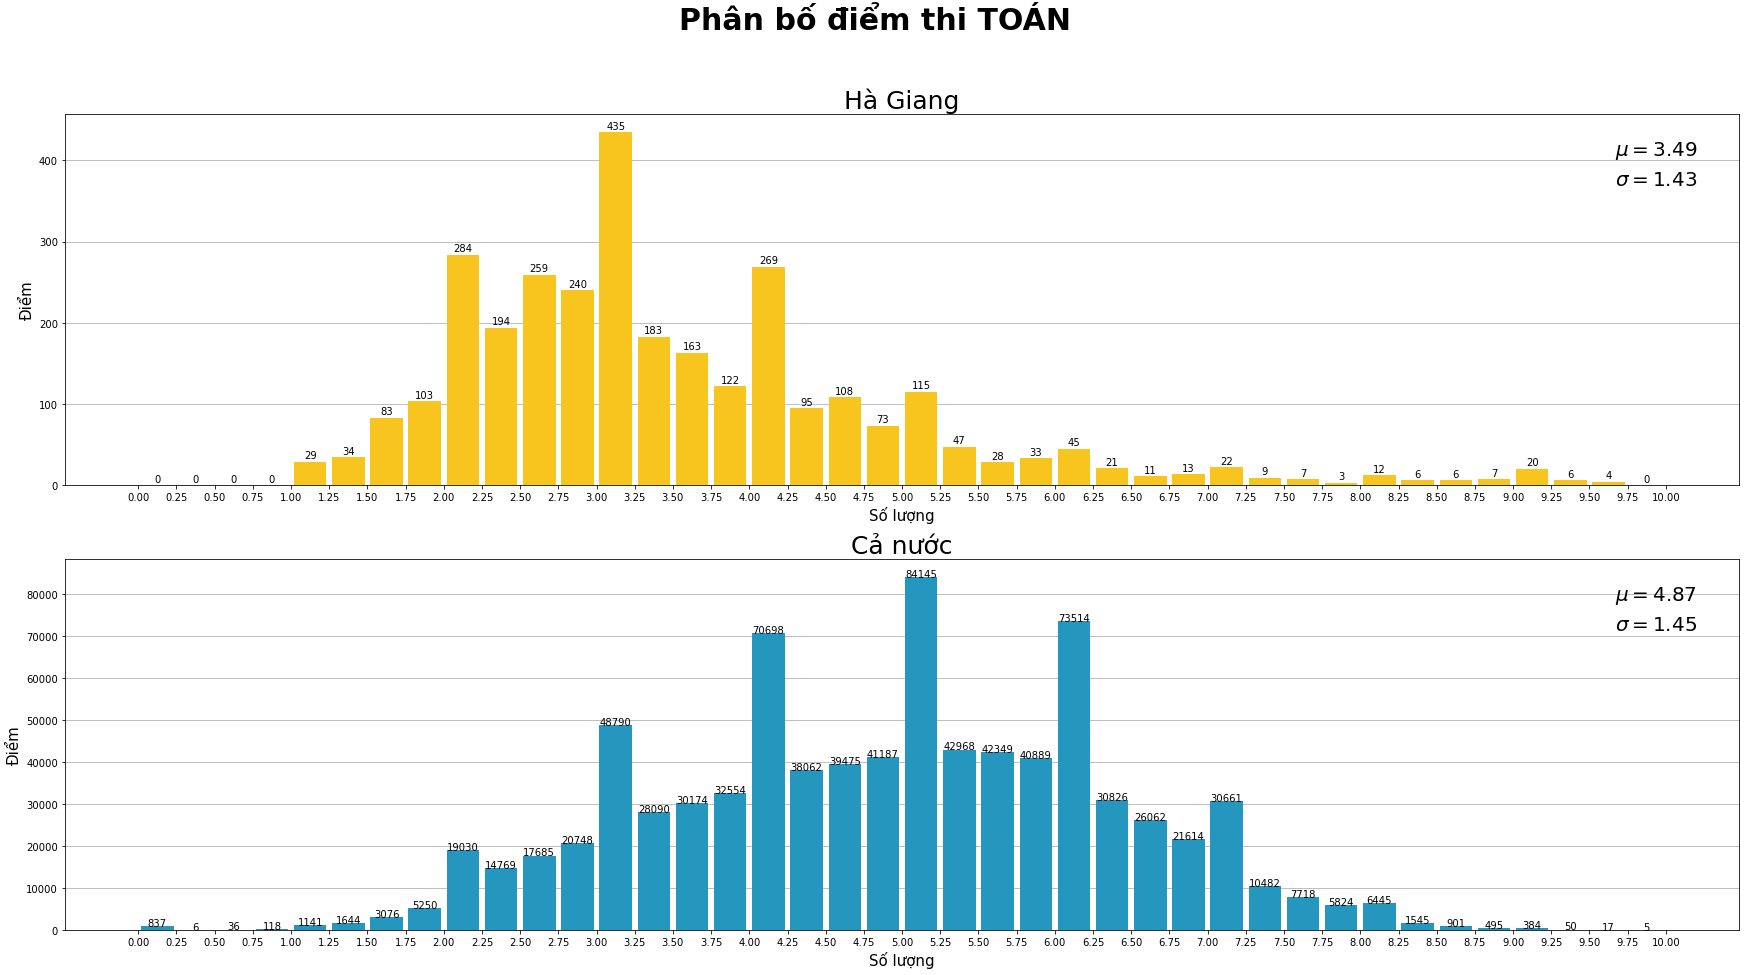

In [728]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'TOÁN')

__Nhận xét:__
- Phân bố điểm của các thí sinh của Hà Giang bị lệch trái. Chứng tỏ đa phần các học sinh Hà Giang học toán dưới trung bình.

### Ngữ văn

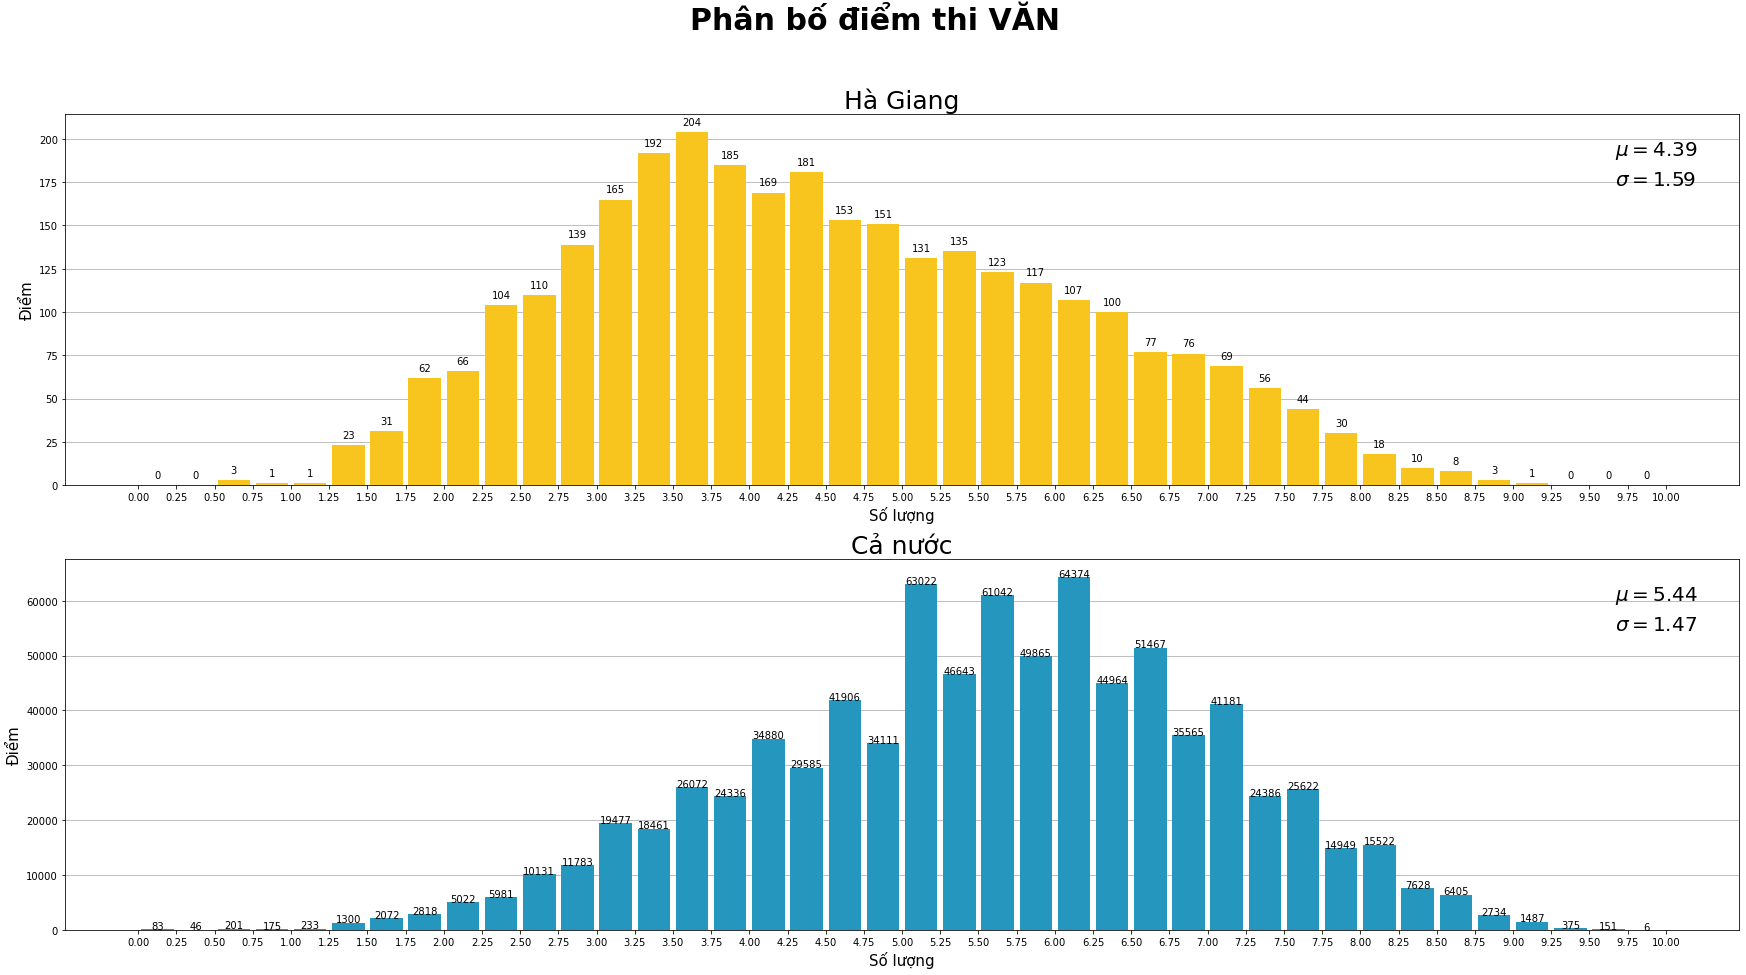

In [729]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'VĂN')

__Nhận xét:__
- Điểm trung bình của các thí sinh khoảng từ 3 đến 4 (dưới trung bình), và thấp hơn cả nước.

### Ngoại ngữ

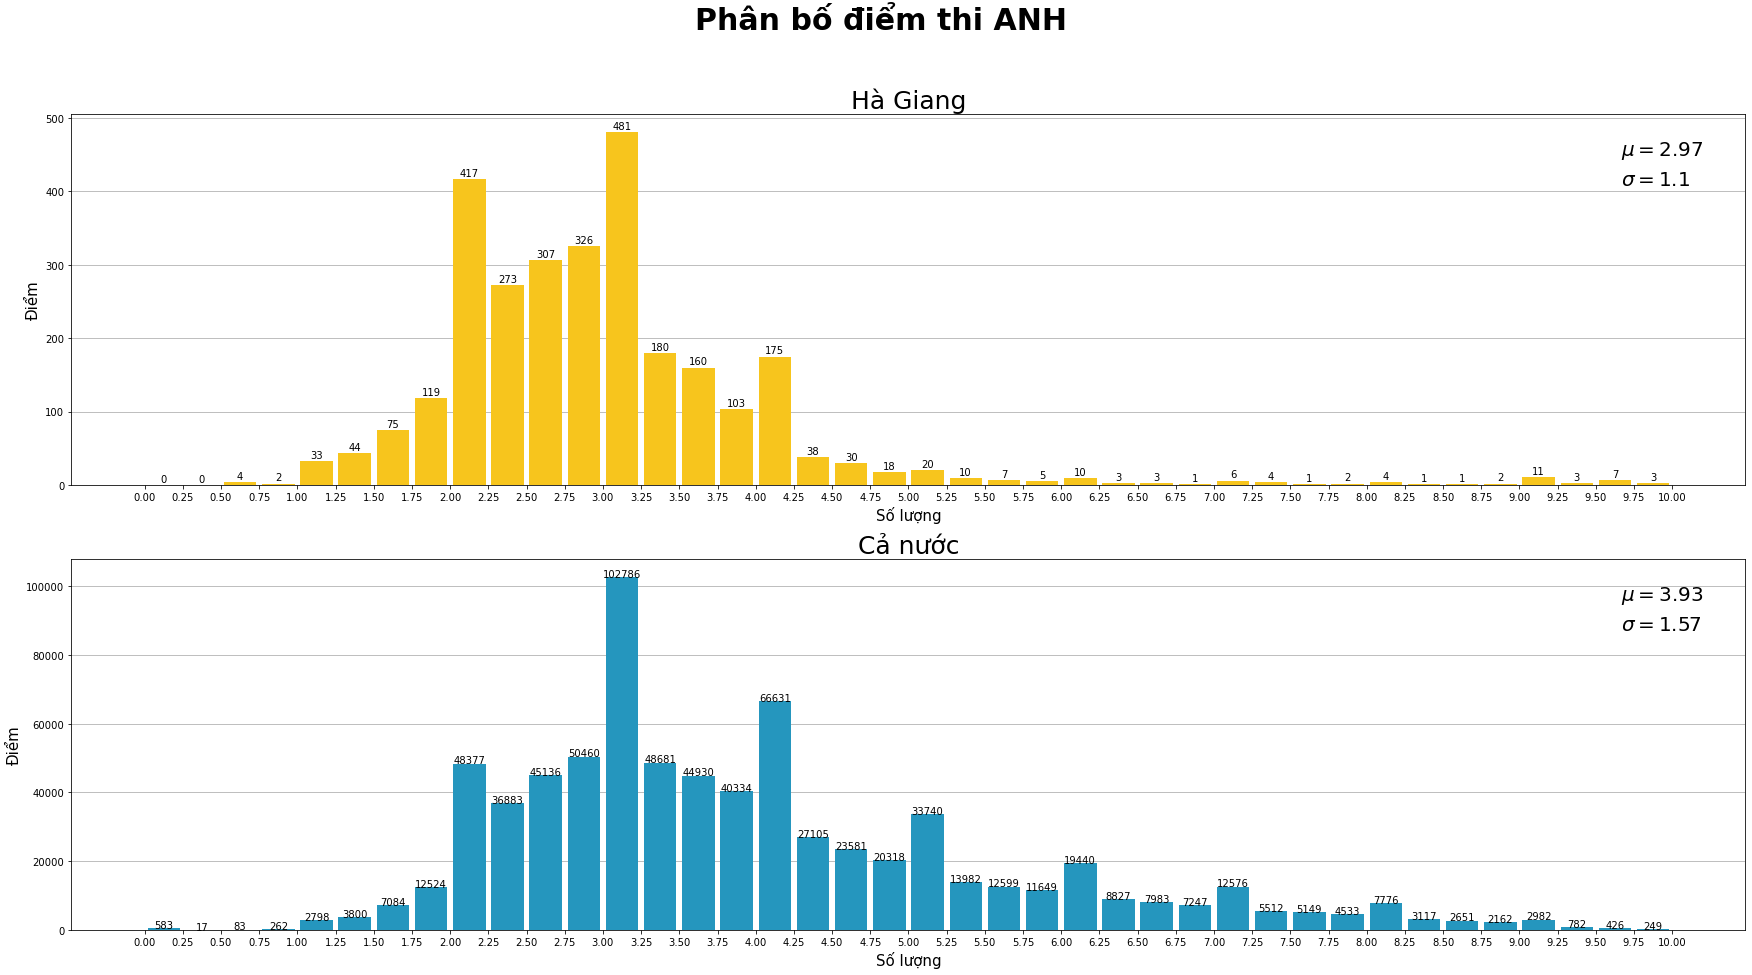

In [730]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'ANH')

### Vật lý

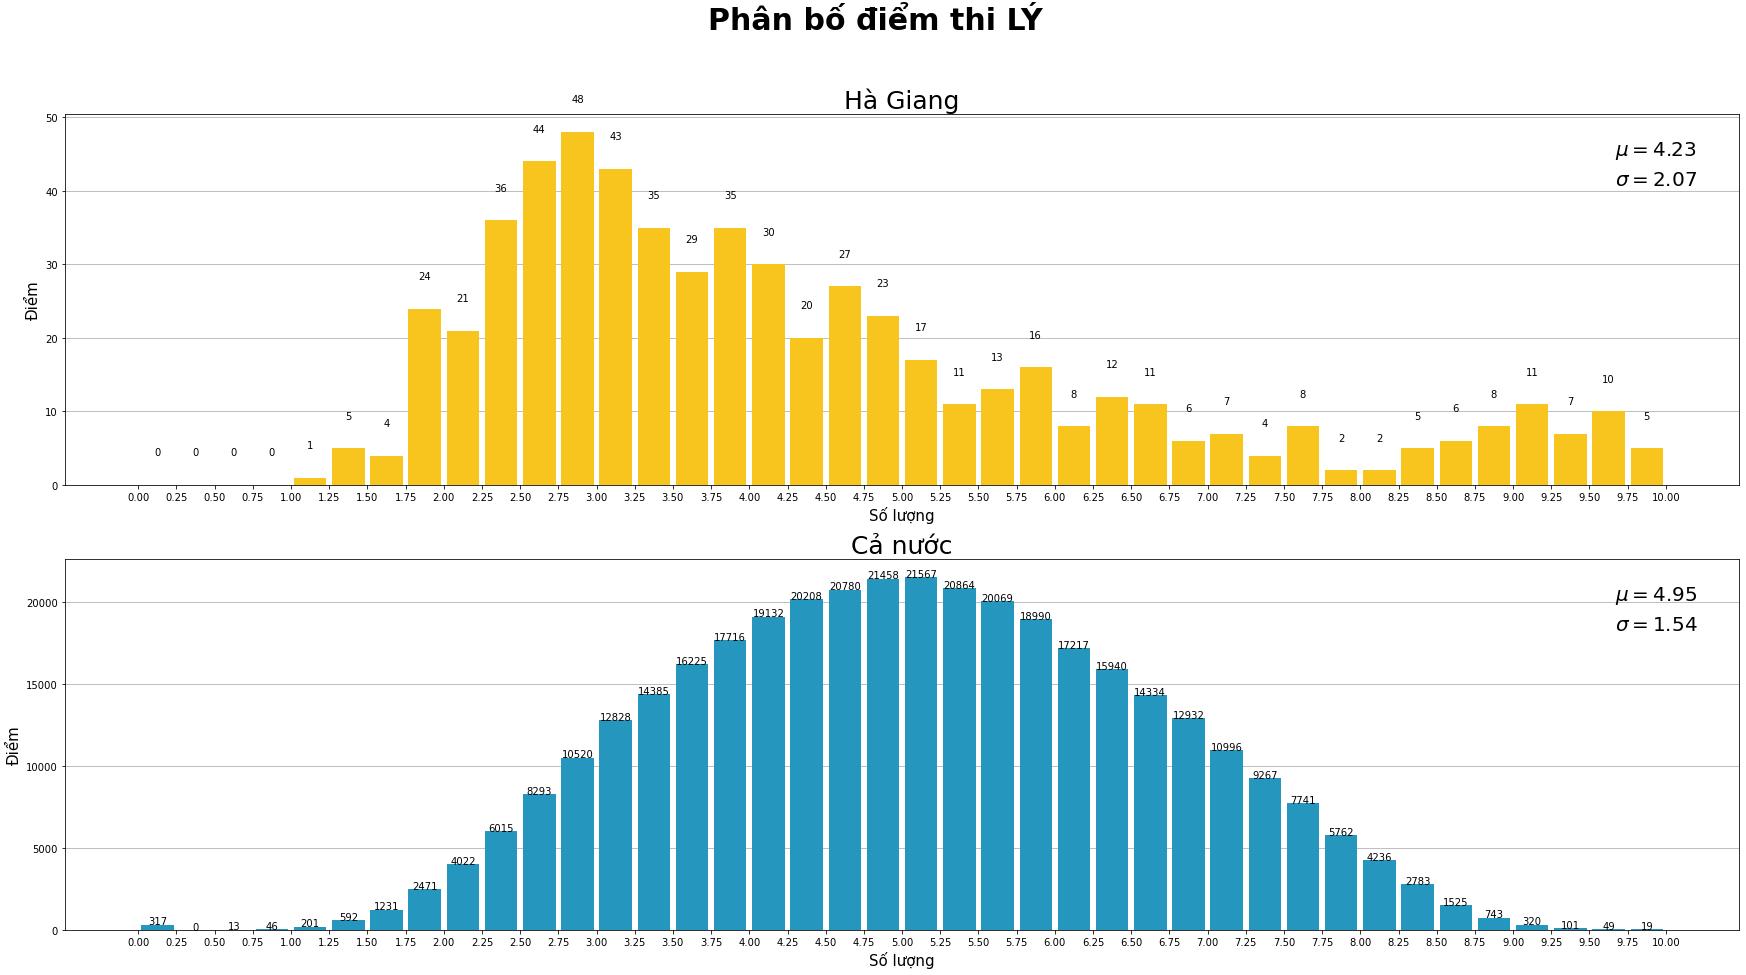

In [731]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'LÝ')

### Hóa học

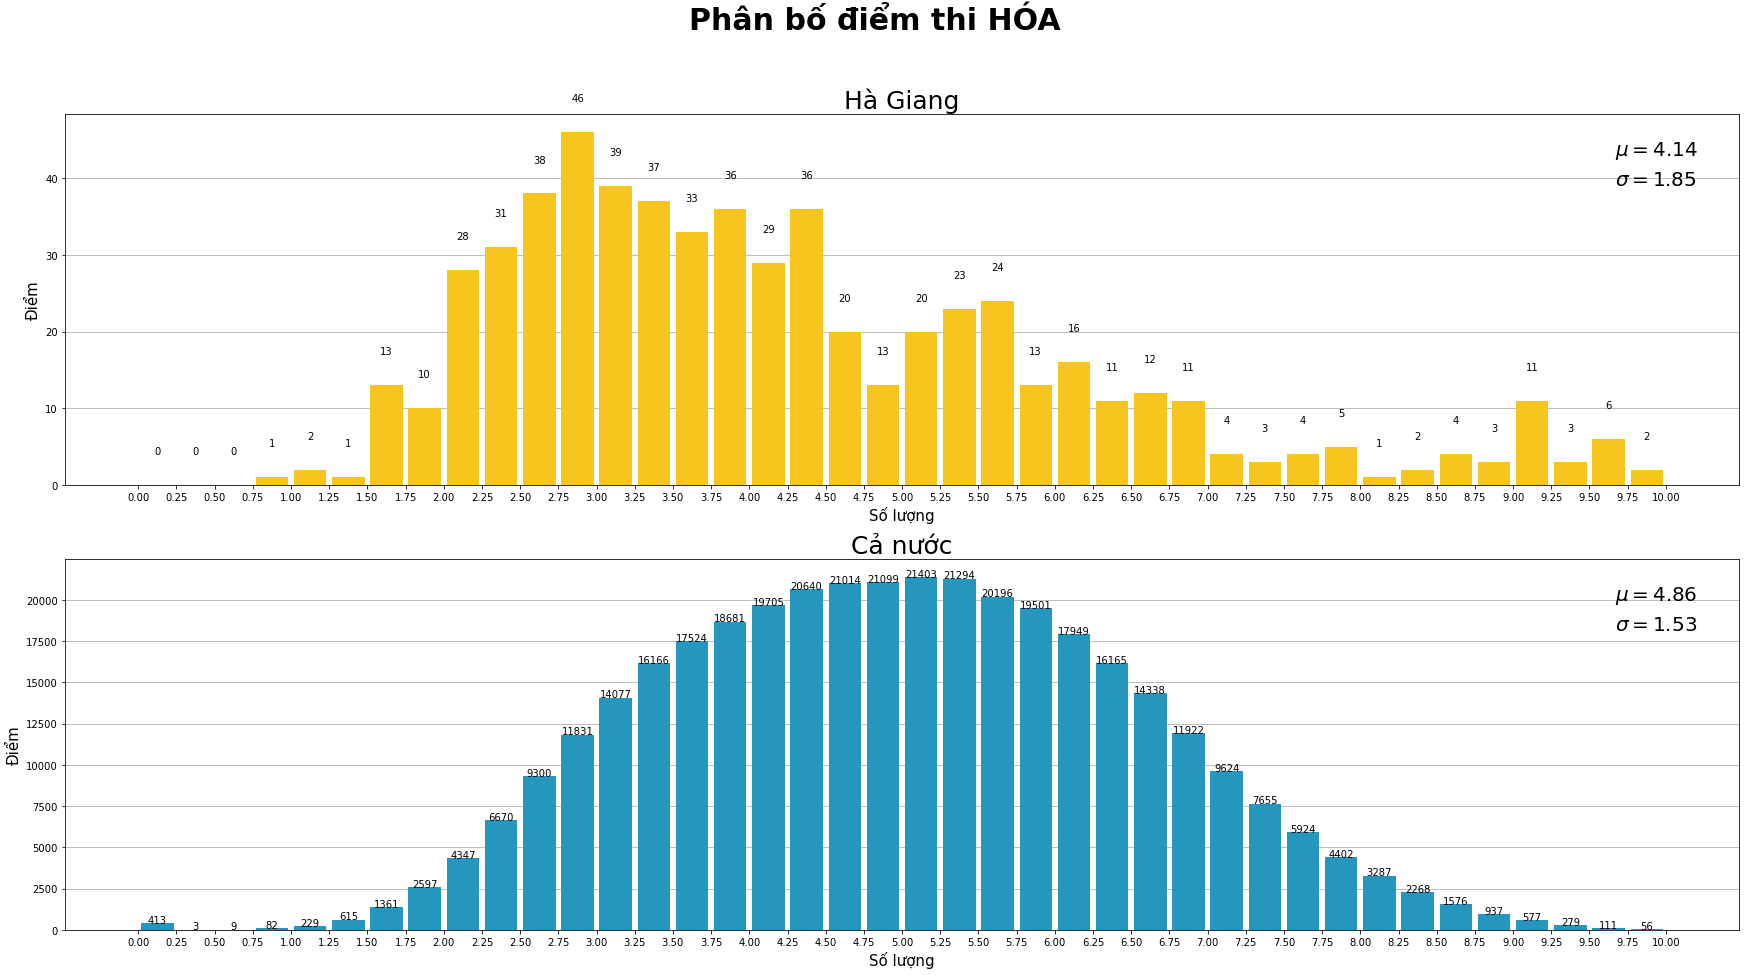

In [732]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'HÓA')

### Sinh học

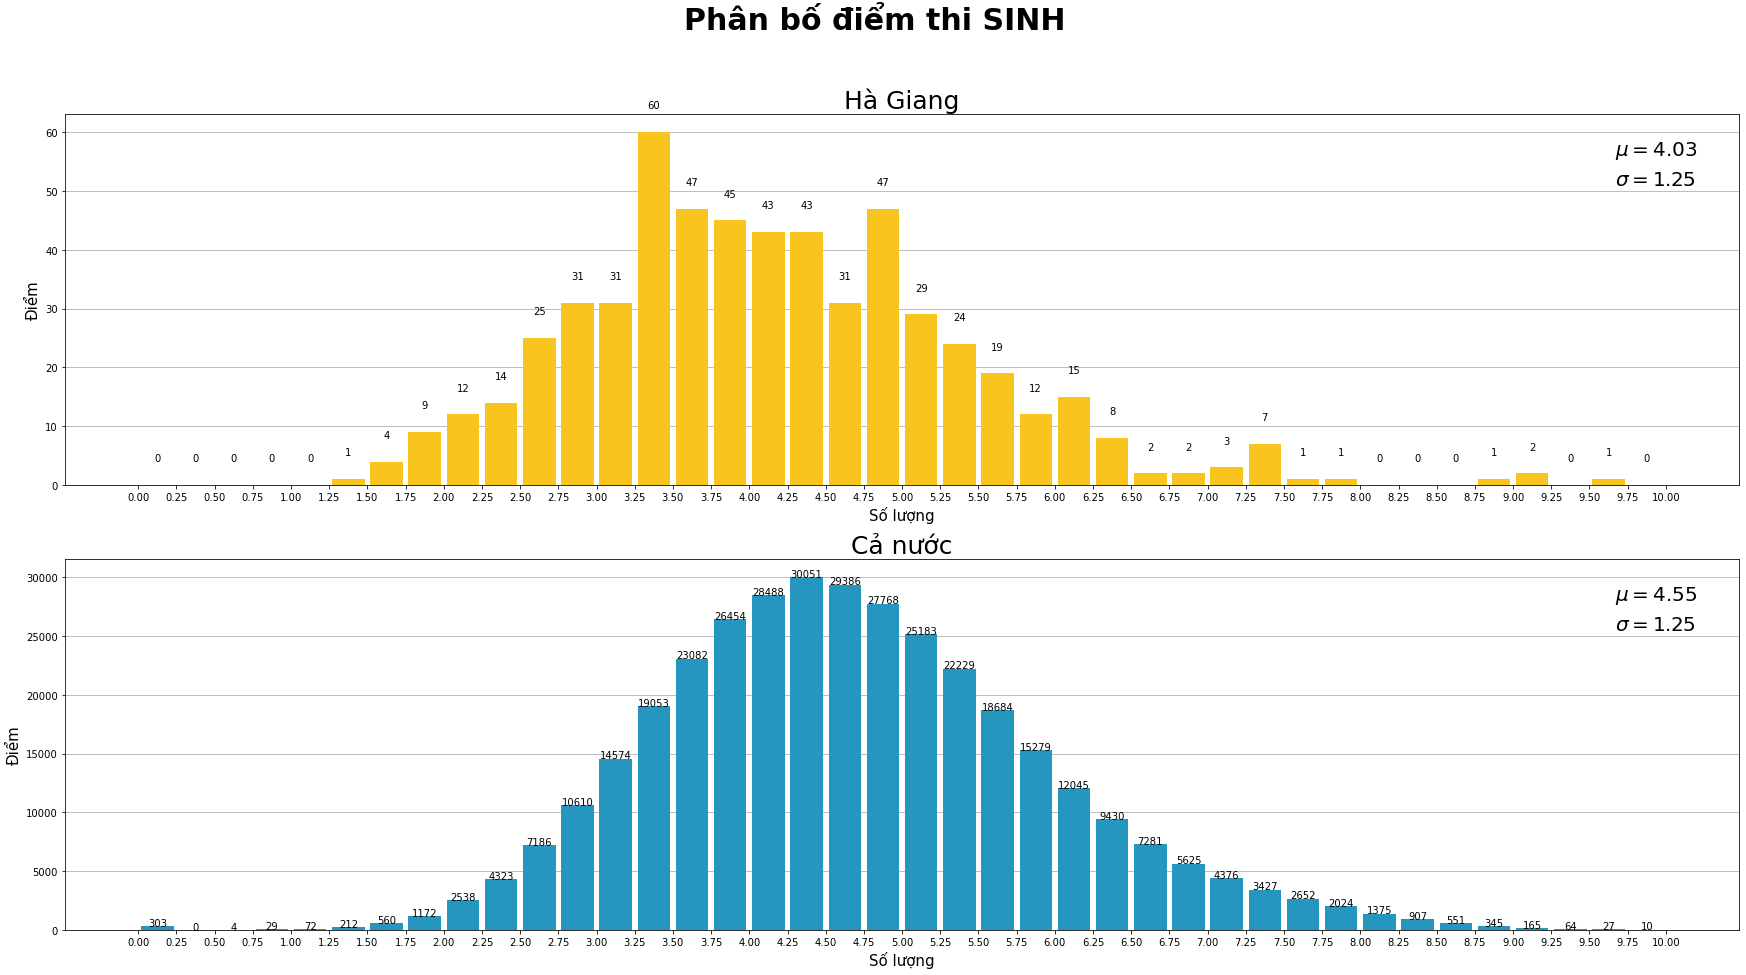

In [733]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'SINH')

### Lịch sử

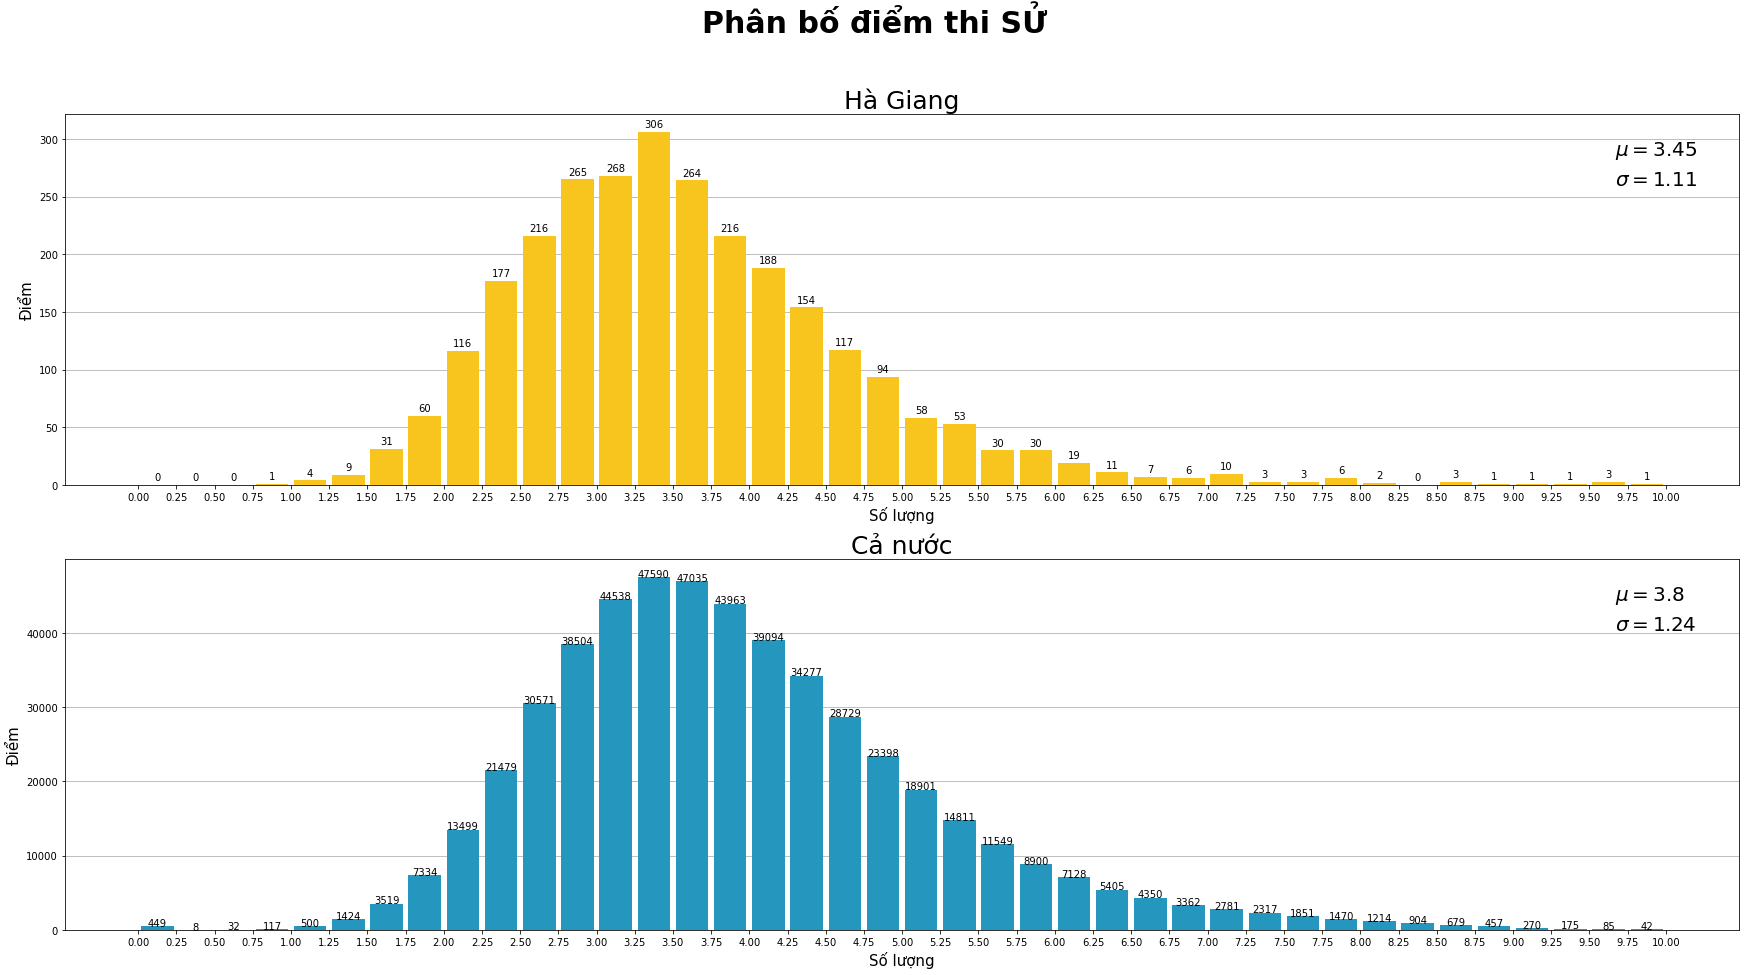

In [734]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'SỬ')

### Địa lý

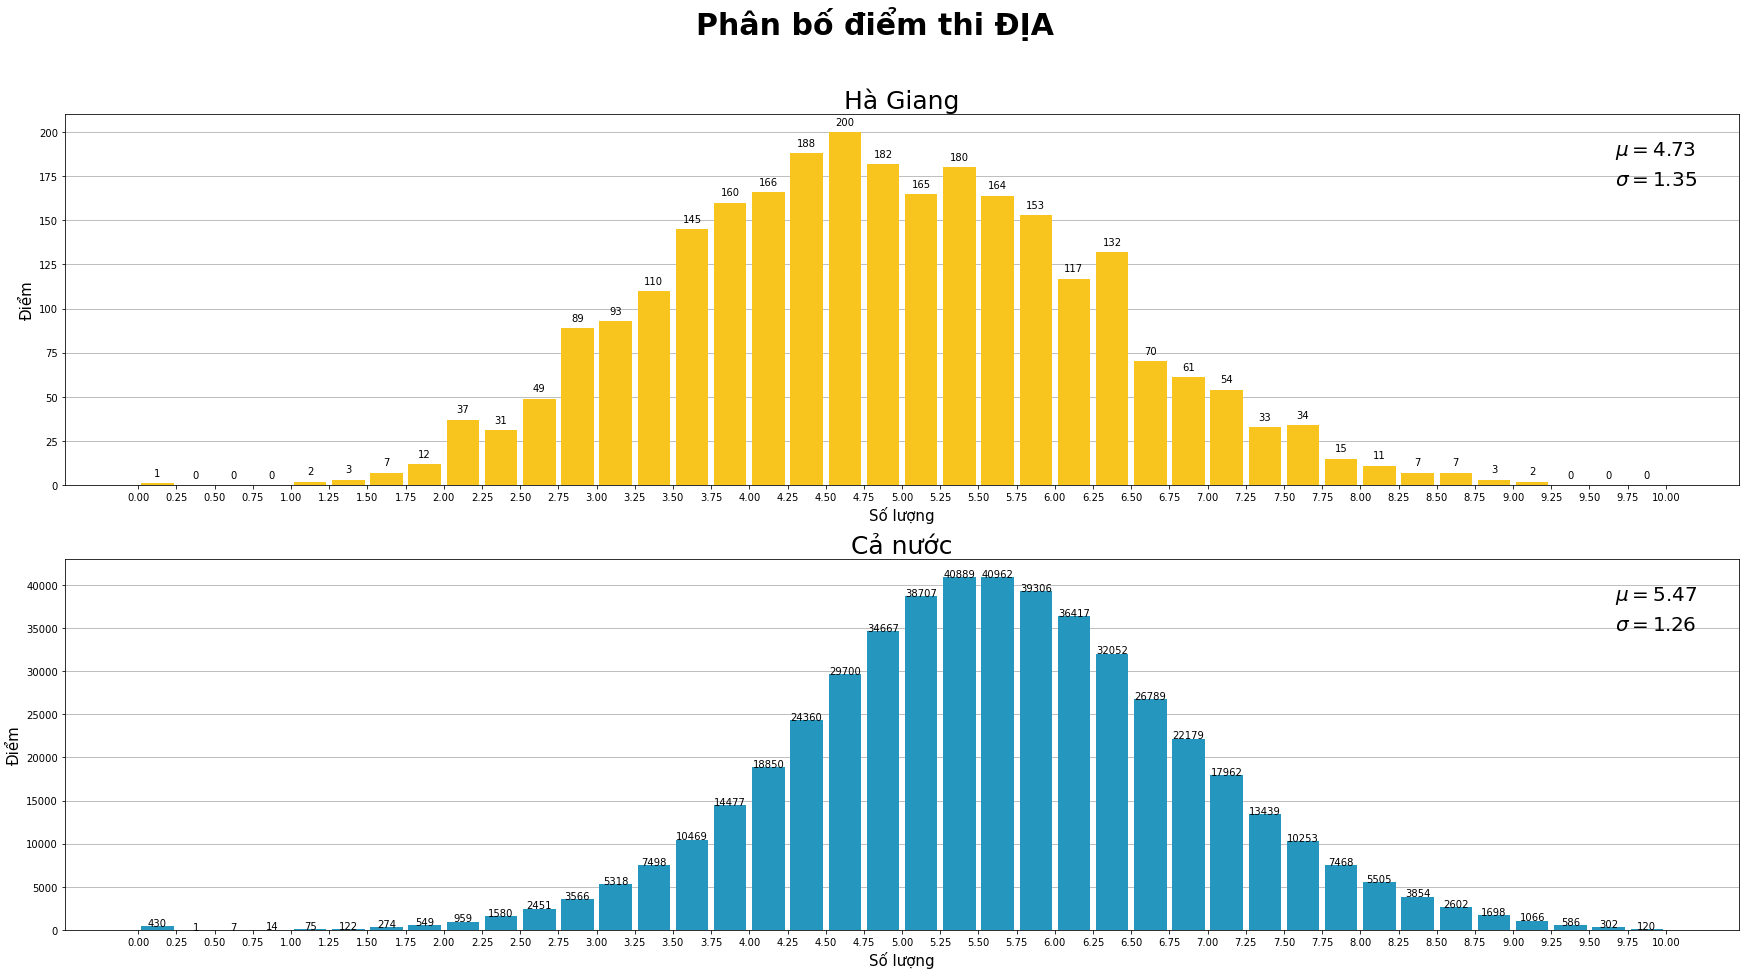

In [735]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'ĐỊA')

### Giáo dục công dân

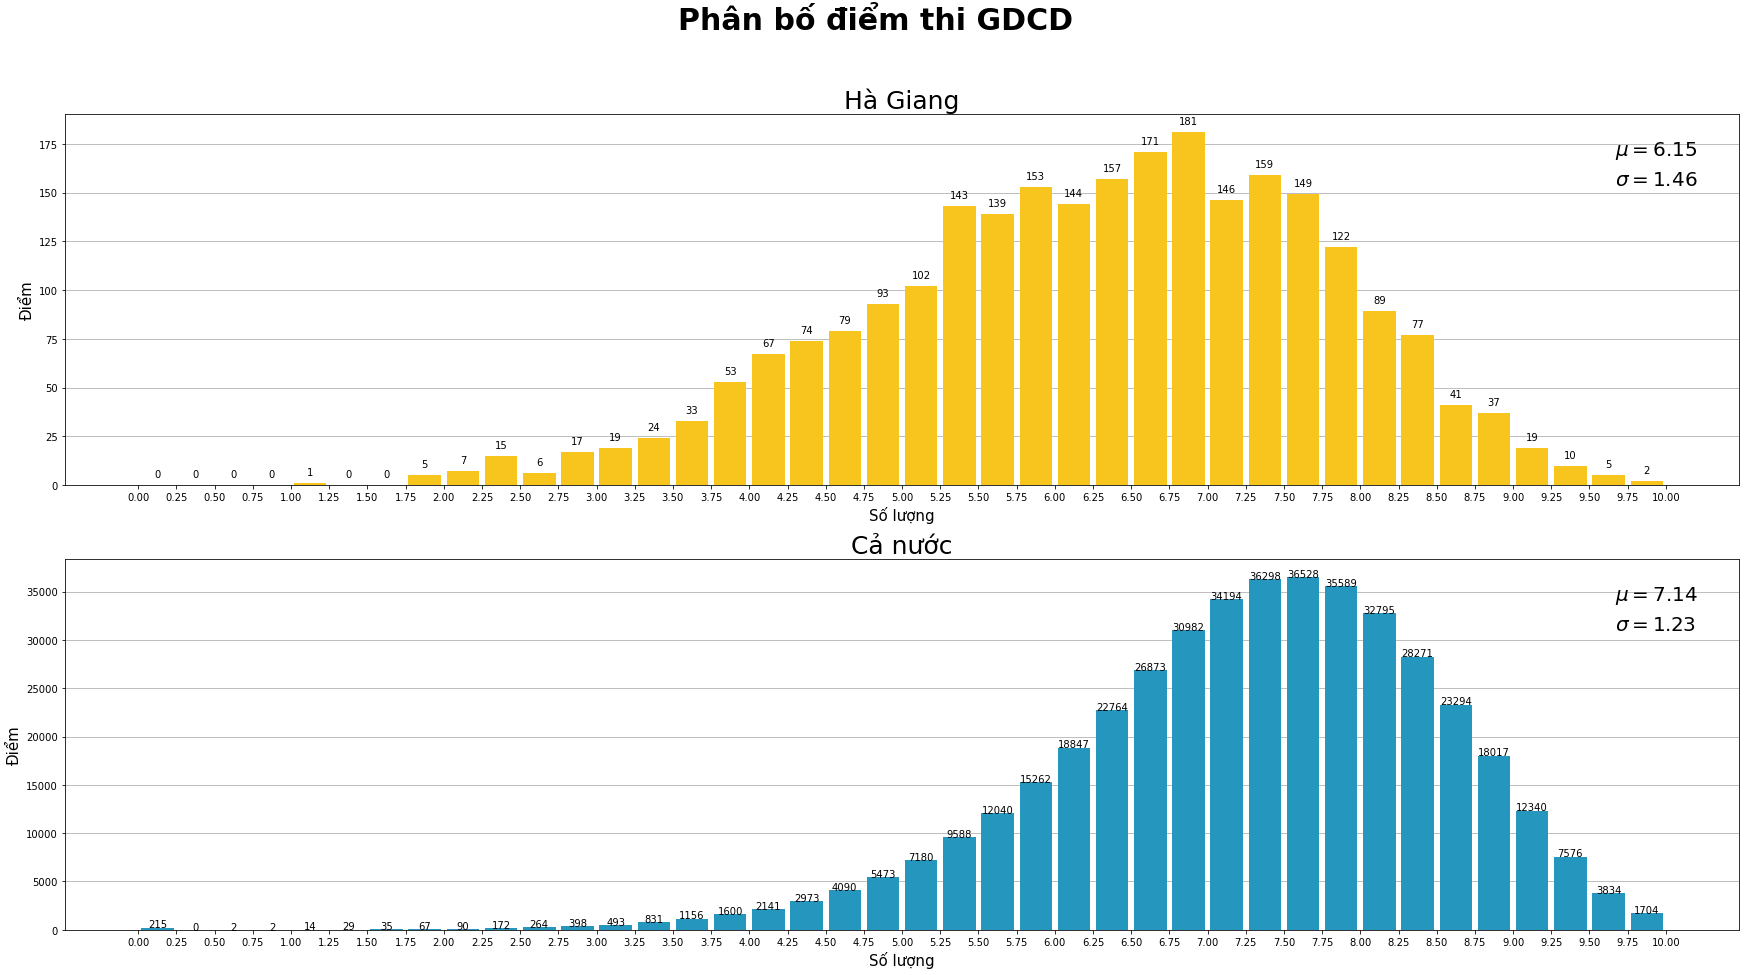

In [736]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'GDCD')

## Phân bố điểm thi các Khối thi
### Tự nhiên
#### Khối A

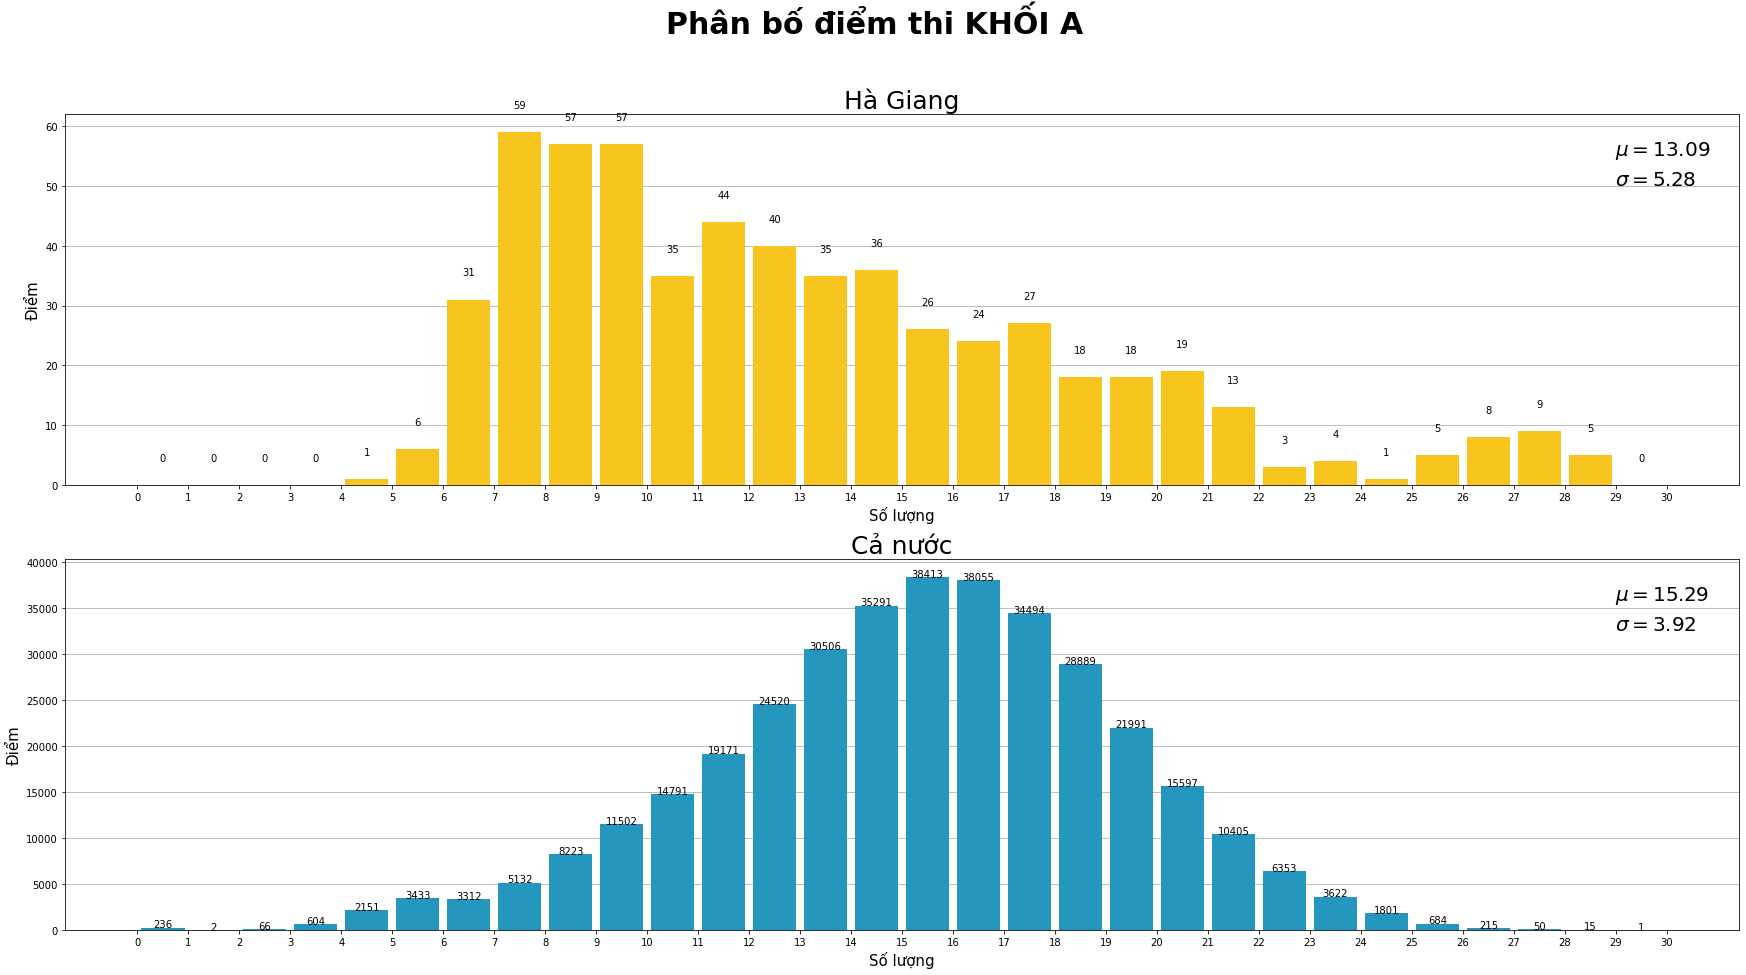

In [737]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI A', num_bins= 30, x_range = (0, 30))

#### Khối A1

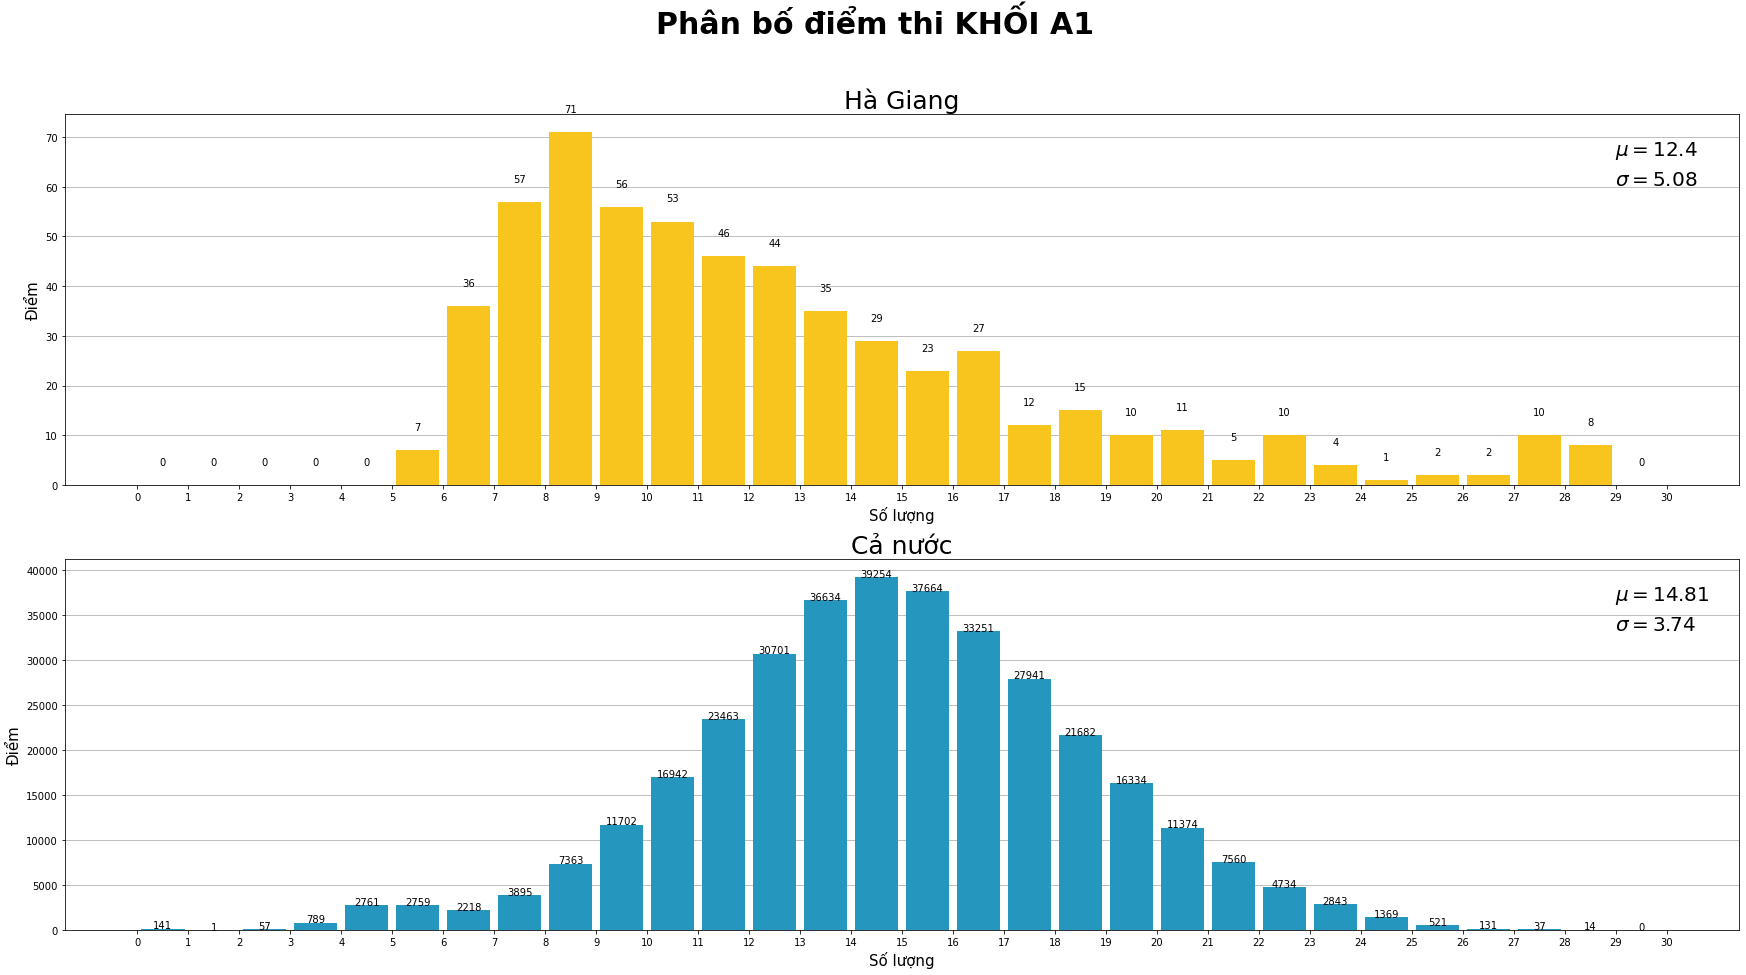

In [738]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI A1', num_bins= 30, x_range = (0, 30))

#### Khối B

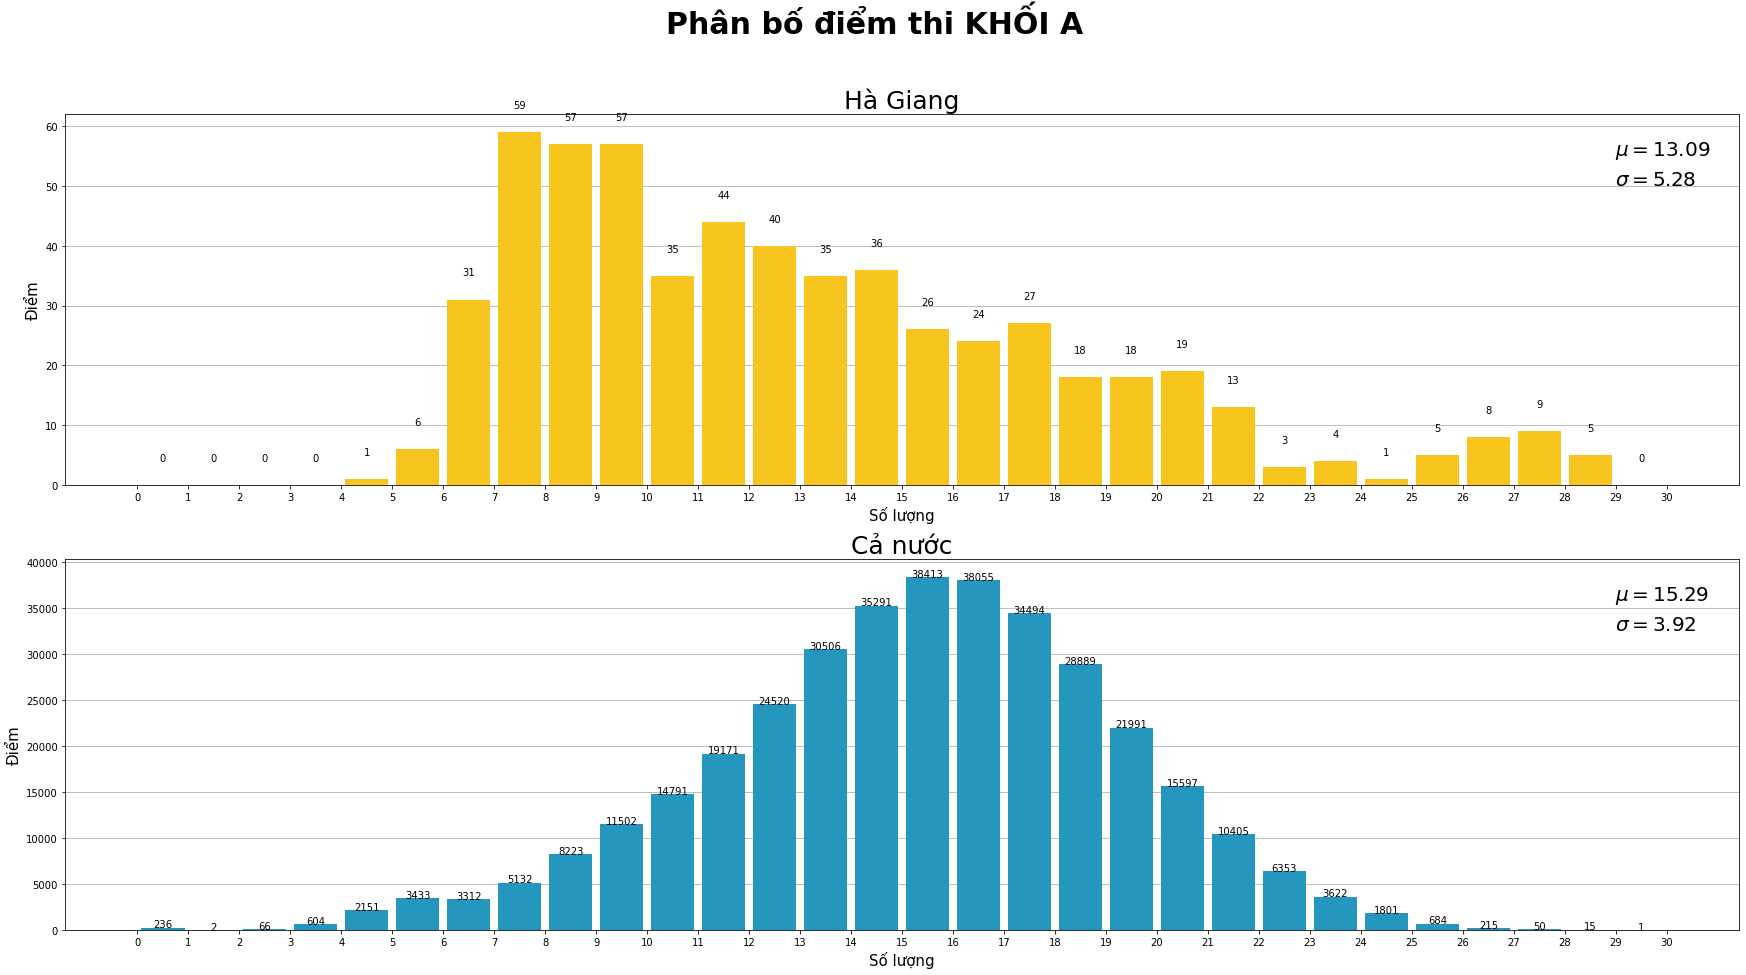

In [739]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI A', num_bins= 30, x_range = (0, 30))

### Xã hội
#### Khối C

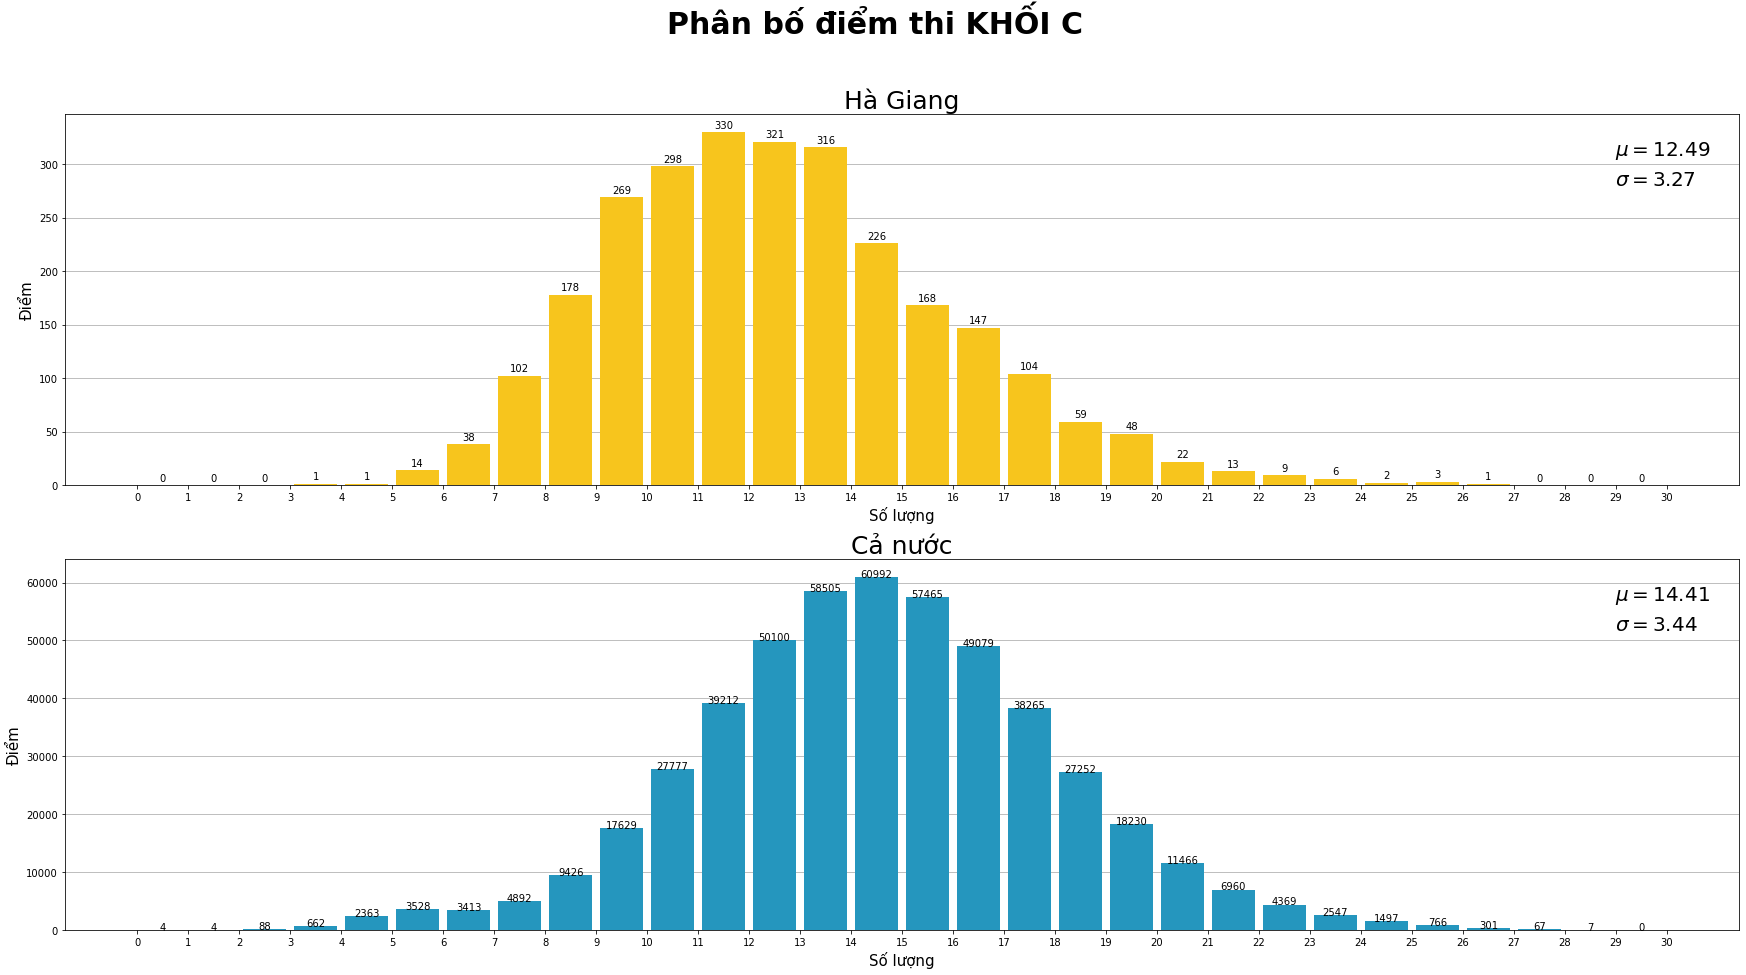

In [740]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI C', num_bins= 30, x_range = (0, 30))

#### Khối D

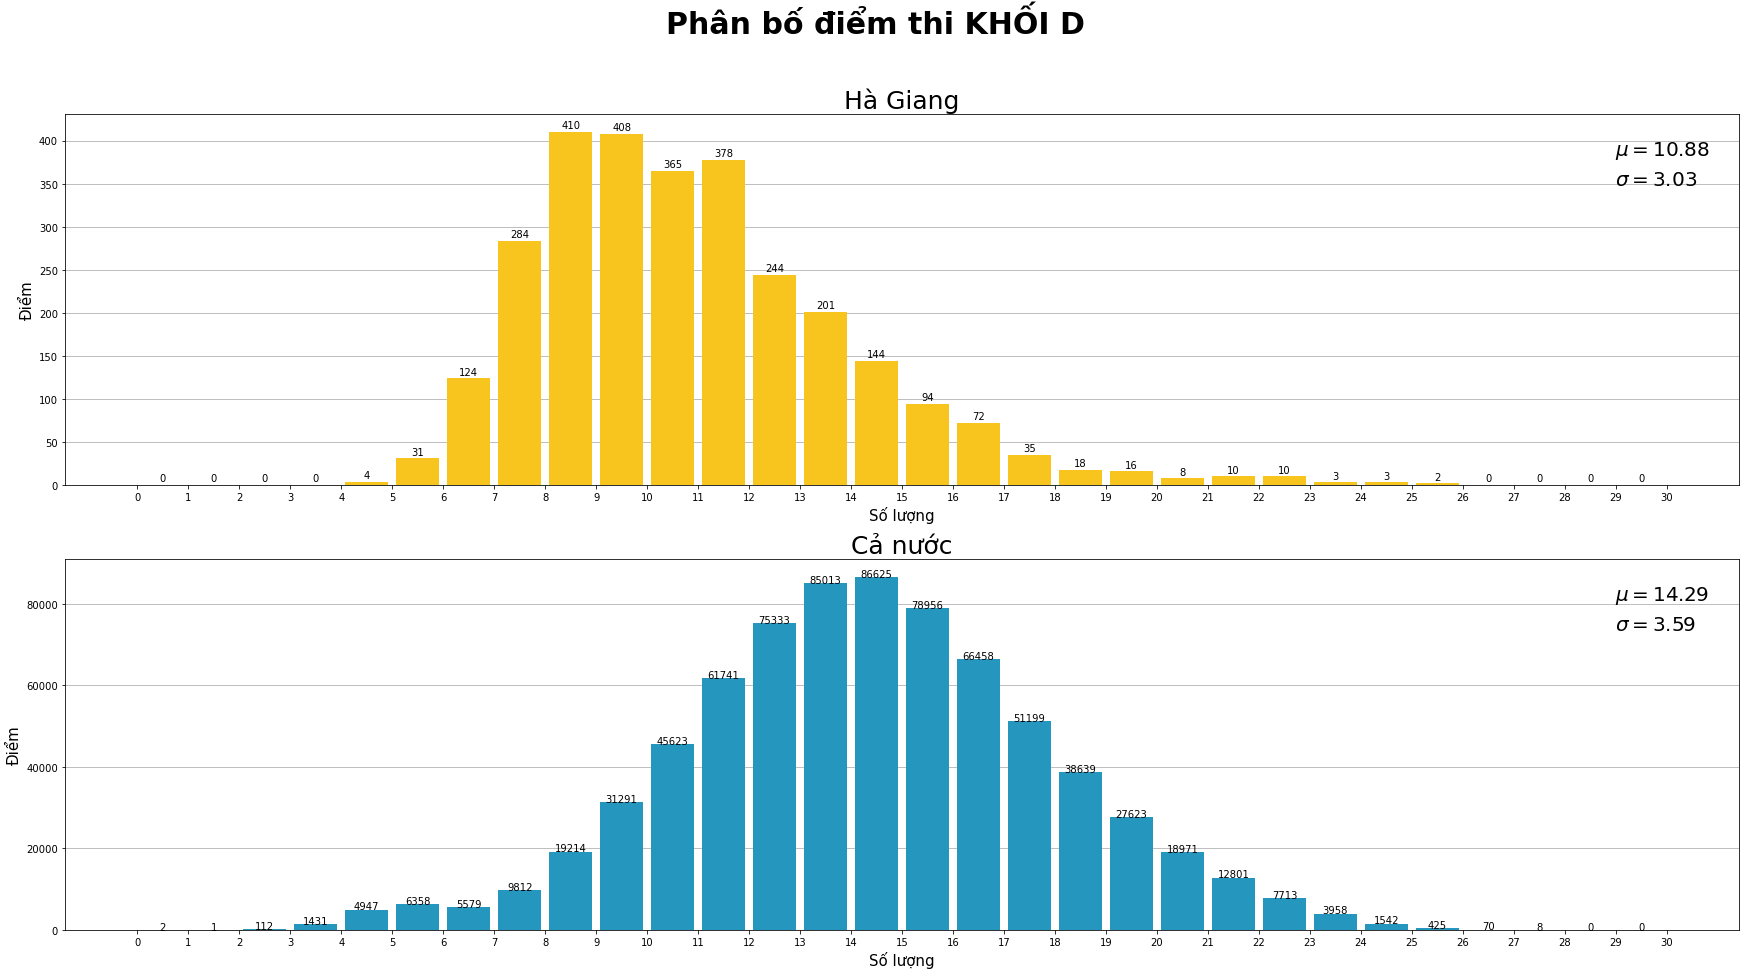

In [741]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI D', num_bins= 30, x_range = (0, 30))

## Tỉ lệ thí sinh > 27đ các khối thi

In [742]:
draw_pie_chart_compare()